In [1]:
import numpy as np

In [2]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

### 50cm 농어의 이웃 구하기

In [3]:
# Scikit-learn 훈련세트는 2차원 배열이여야 함으로, Numpy의 reshape method를 사용해서 2차원으로 봐꿔줌
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)

In [4]:
train_input = train_input.reshape(-1, 1) # 열이 하나, 남은 차원의 개수는 하나가 된다.
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3) # class 객체 할당

# k-최근접 이웃 회귀 모델을 훈련합니다.
knr.fit(train_input, train_target) # train, target 데이터 전달 & 훈련

KNeighborsRegressor(n_neighbors=3)

In [6]:
# 학습시킨 모델을 사용해서 길이가 50cm인 농어의 무게 예측
print(knr.predict([[50]]))

[1033.33333333]


- 오른쪽 샘플들이 최근접이웃. 길이가 늘어나면 무게도 늘어나야 함. 
- 최근접 이웃은 가장 가까운 sample 참고해서 예측값을 만들기 때매, 극단적인 값이여도 근처에 있는 이웃한 sample 사용

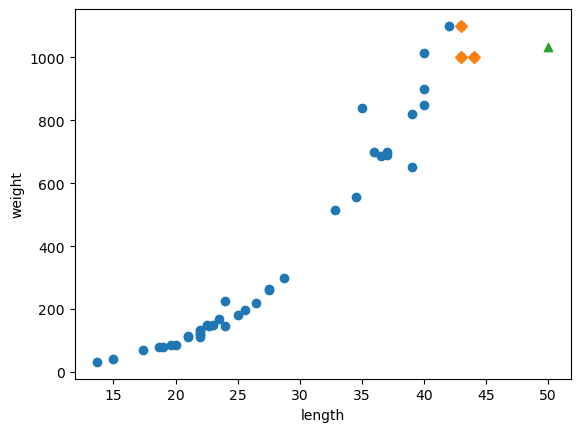

In [26]:
import matplotlib.pyplot as plt

# 50cm 농어의 이웃을 구합니다.
distances, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 50cm 농어 데이터
plt.scatter(50, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [27]:
print(np.mean(train_target[indexes]))

1033.3333333333333


In [28]:
print(knr.predict([[100]]))

[1033.33333333]


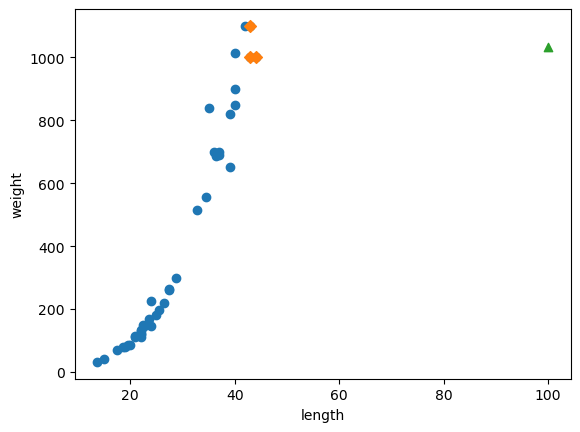

In [34]:
# 100cm 농어의 이웃 example
distances, indexes = knr.kneighbors([[100]])

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 훈련 세트 중에서 이웃 샘플만 다시 그립니다.
plt.scatter(train_input[indexes], train_target[indexes], marker='D')

# 100cm 농어 데이터
plt.scatter(100, 1033, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 선형 회귀 (Linear Regression)
- Logistic Regression도 선형 회귀 기반
- 신경망(RNN)도 선형 회귀 기반
- 특징을 여러개 사용해서 복잡한 모델 구현 가능

- 여기서는 직선의 방정식 사용
y = a * x + b, 농어무게(y) = a(기울기) * 농어길이(x) + b(y의 절편, y의 축과 만나는 값)

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

# 50cm 농어에 대한 예측
print(lr.predict([[50]]))

[1241.83860323]


In [31]:
#scikit-learn 모델들은 데이터에서 학습한 값들을 저장할때, 다른 속성과 구분하기 위하여 '_' 추가
print(lr.coef_, lr.intercept_) # 모델 parameter들

[39.01714496] -709.0186449535474


### 학습한 직선 그리기

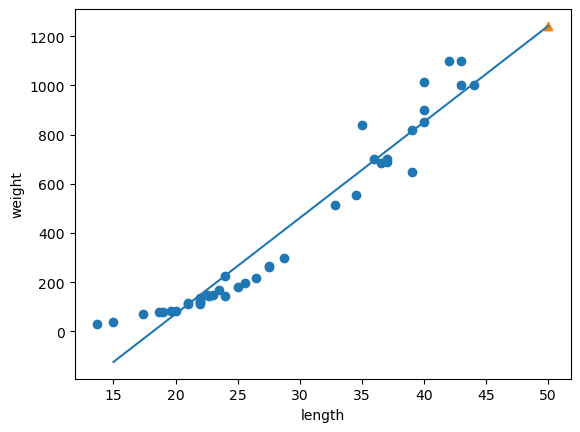

In [35]:
# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15~50까지 1차 방정식 그래프를 그립니다. [lr.coef_+lr.intercept_: 기울기 + 절편]
plt.plot([15, 50], [15*lr.coef_+lr.intercept_, 50*lr.coef_+lr.intercept_])

# 50cm 홍어 데이터
plt.scatter(50, 1241.8, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [36]:
# training이 최근접 이웃으로 했던 점수보다 낮아서 과소적합?
print(lr.score(train_input, train_target))

0.9398463339976041


In [37]:
# training의 과대 적합일수도
print(lr.score(test_input, test_target))

0.824750312331356


- 근데 그래프의 직선을 보면 왼쪽 아래로 내려가있음, 즉 이건 음수로 떨어질수도..
- intercept_ (절편이 음수로 나왔음)

### 다항 회귀
- x의 다항식으로 만들어서 하는 선형회귀를 다항 회귀 라고 합니다.
- 데이터 셋이 구부러진 곡선으로 보여짐, 그러면 2차 방정식의 그래프를 사용해서 구현.
- 무게 = a* 길이^2(x^2) + b * 길이(x) + c

In [38]:
# 2차 방정식의 그래프를 그리기 위하여 길이를 제곱한 항을 training_set에 추가
# Numpy Broadcasting 적용
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [39]:
# 새롭게 만든 dataset 크기 확인
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


무게 = 1.01 x 길이^2 - 21.6 x 길이 + 116.05

In [40]:
# Model 다시 training
lr = LinearRegression()
lr.fit(train_poly, train_target) # train_target - 예측하고자 하는 농어의 무게 (변동 없음)

print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [41]:
print(lr.coef_, lr.intercept_)
# 제곱항을 2개 넣었기 때문에, 계수가 2개가 출력.[1.01433211 -21.55792498], 절편: 116.05021078278338

[  1.01433211 -21.55792498] 116.05021078278338


### 학습한 직선 그리기

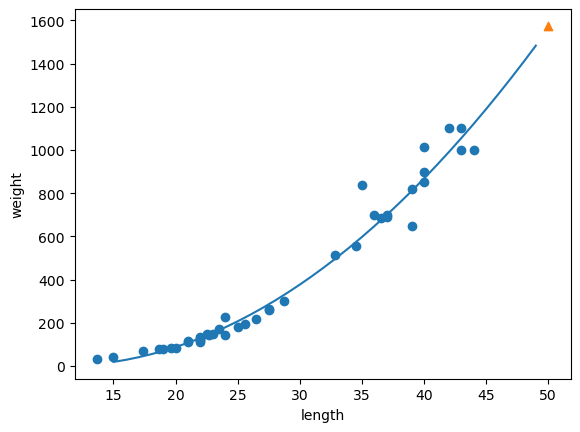

In [42]:
# 구간별 직선을 그리기 위해 15~50 까지 정수 배열을 만듭니다.
point = np.arange(15,50)

# 훈련 세트의 산점도를 그립니다.
plt.scatter(train_input, train_target)

# 15에서 50까지 2차 방정식 그래프를 그립니다.
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)

# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [43]:
print(lr.score(train_poly, train_target))

0.9706807451768623


In [44]:
print(lr.score(test_poly, test_target))

0.9775935108325122
